병합 군집agglomerative clustering 알고리즘은 

시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합침

종료조건 : 클러스터 갯수, 지정된 갯수의 클러스터가 남을 때까지 비슷한 클러스터를 합침

linkage: 옵션에서 가장 비슷한 클러스터를 측정하는 방법 지정, 이 측정은 항상 두 클러스터 사이에서 이뤄짐

ward : 기본값, 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침, 크기가 비교적 비슷한 클러스터가 만들어짐

average : 클러스터 포인트 사이의 평균 거리가 가장 짤븐 두 클러스터를 합침

complete : complete연결(최대 연결)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침

클러스터에 속한 포인트 수가 많이 다를 때(하나의 클러스터가 다른 것보다 매우 클 때 ) average나 complete가 더 나음

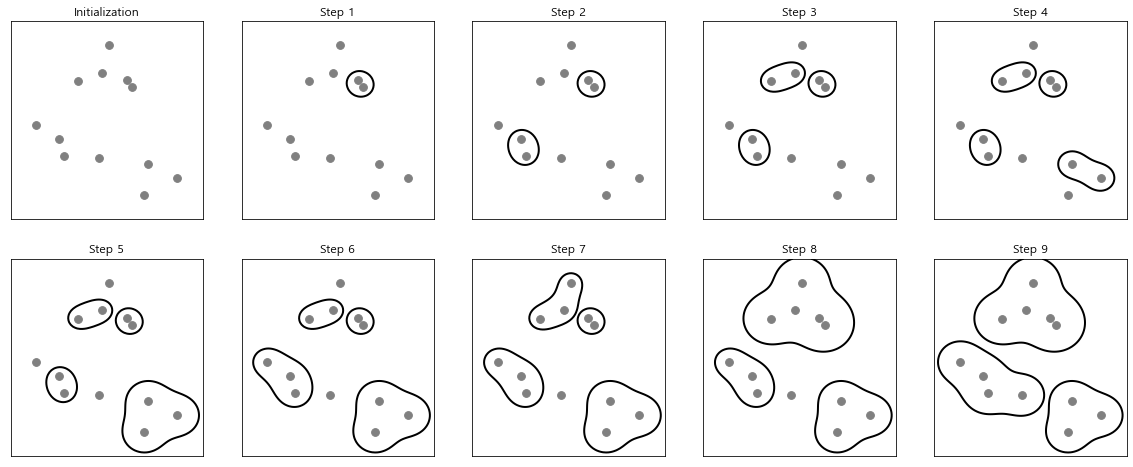

In [8]:
import mglearn
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


mglearn.plots.plot_agglomerative_algorithm()
plt.show()

1. 초기에 각 포인트가 하나의 클러스터

2. 가장 가까운 두 클러스터가 합쳐짐

3. step4까지 이 방식으로 진행

4. step5에서 두 개의 포인트를 가진 클러스중 하나가 3개로 확장

5. step9까지 이 방식으로 진행

6. 3개의 클러스터를 찾는다고 지정하면 알고리즘은 종료

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


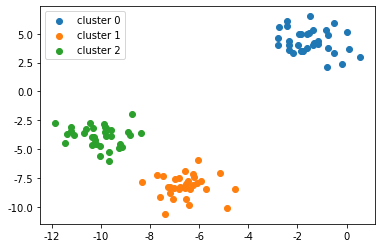

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

x, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(x)
a = assign.reshape(-1, 1)
x1 = np.hstack([x, a])

# 각 클래스별로 데이터 추출

x_0 = x1[x1[:, 2]==0, :]
x_1 = x1[x1[:, 2]==1, :]
x_2 = x1[x1[:, 2]==2, :]

# 시각화

plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

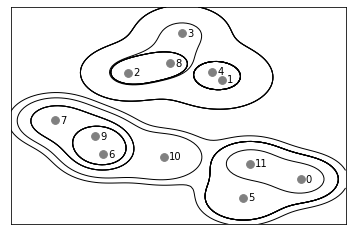

In [4]:
mglearn.plots.plot_agglomerative()

plt.show()

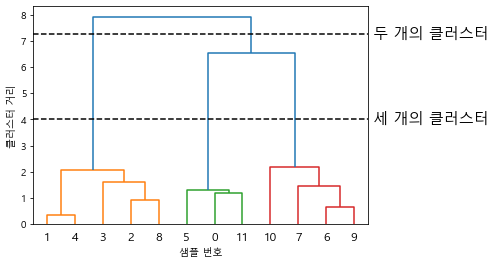

In [9]:
from scipy.cluster.hierarchy import dendrogram, ward

x, y = make_blobs(random_state=0, n_samples=12)


### 데이터 배열 x에 ward 함수를 적용
### scipy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환

linkage_array = ward(x)
dendrogram(linkage_array)
ax = plt.gca() # get current axes
bounds = ax.get_xbound() # x축 데이터(처음과 끝), 즉 최소/최대값을 가진 (1,2)리스트

ax.plot(bounds, [7.25, 7.25], linestyle='--', c='k') # 임의로 라인 생성
ax.plot(bounds, [4, 4], linestyle='--', c='k')
ax.text(bounds[1], 7.25, ' 두 개의 클러스터', va='center', fontdict={'size':15}) # bounds: x축 끝
ax.text(bounds[1], 4, ' 세 개의 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
plt.show()